In [23]:
#Image classification Belajar Machine Learning untuk Pemula
#mengimport data yang akan digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#Mengunduh file ke dalam colaboratory
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-24 03:01:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.83MB/s    in 56s     

2021-06-24 03:02:31 (5.49 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [25]:
import zipfile, os

In [26]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

In [27]:
os.listdir ('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [28]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [30]:
# membuat direktori ruangan rapi pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori ruangan berantakan pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori ruangan rapi pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [40]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [51]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [54]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2
      )

Epoch 1/20
32/32 - 8s - loss: 1.1926 - accuracy: 0.3481 - val_loss: 1.0590 - val_accuracy: 0.5742
Epoch 2/20
32/32 - 8s - loss: 0.9175 - accuracy: 0.6016 - val_loss: 0.6619 - val_accuracy: 0.7891
Epoch 3/20
32/32 - 8s - loss: 0.5498 - accuracy: 0.7871 - val_loss: 0.4632 - val_accuracy: 0.8281
Epoch 4/20
32/32 - 7s - loss: 0.3919 - accuracy: 0.8551 - val_loss: 0.6041 - val_accuracy: 0.7656
Epoch 5/20
32/32 - 7s - loss: 0.3569 - accuracy: 0.8783 - val_loss: 0.2762 - val_accuracy: 0.9023
Epoch 6/20
32/32 - 8s - loss: 0.2776 - accuracy: 0.9155 - val_loss: 0.2279 - val_accuracy: 0.9258
Epoch 7/20
32/32 - 7s - loss: 0.2232 - accuracy: 0.9306 - val_loss: 0.1953 - val_accuracy: 0.9258
Epoch 8/20
32/32 - 8s - loss: 0.1590 - accuracy: 0.9463 - val_loss: 0.1625 - val_accuracy: 0.9453
Epoch 9/20
32/32 - 8s - loss: 0.1277 - accuracy: 0.9517 - val_loss: 0.1165 - val_accuracy: 0.9766
Epoch 10/20
32/32 - 8s - loss: 0.1445 - accuracy: 0.9551 - val_loss: 0.2002 - val_accuracy: 0.9336
Epoch 11/20
32/32 -

Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I (2).png
0Uomd0HvOB33m47I.png
Tangan Ini Menunjukkan bentuk KERTAS


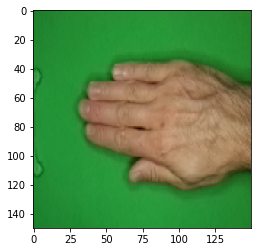

In [61]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                            

uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              
  imgplot = plt.imshow(img)                                                       
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                 
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                                   
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                
  else:
    print('Tidak Diketahui')                                            

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)             

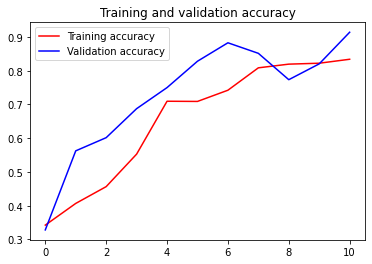

<Figure size 432x288 with 0 Axes>

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()